In [140]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
# Create the connection
cnx  = sqlite3.connect(r'data-oasis-ene-wind-solar-summary_00.db')

In [141]:
for row in cnx.execute("PRAGMA table_info([report_item]);"):
    print(row)

(0, 'id', 'TEXT', 0, None, 1)
(1, 'rto_name', 'TEXT', 0, None, 0)


In [142]:
for row in cnx.execute("PRAGMA table_info([report_data]);"):
    print(row)

(0, 'data_item', 'TEXT', 0, None, 1)
(1, 'interval_end_gmt', 'TEXT', 0, None, 2)
(2, 'interval_start_gmt', 'TEXT', 0, None, 3)
(3, 'value', 'INTEGER', 0, None, 4)
(4, 'opr_date', 'TEXT', 0, None, 5)
(5, 'report_item_id', 'TEXT', 0, None, 0)


In [143]:
for row in cnx.execute("PRAGMA table_info([report_header]);"):
    print(row)

(0, 'report', 'TEXT', 0, None, 1)
(1, 'system', 'TEXT', 0, None, 2)
(2, 'sec_per_interval', 'INTEGER', 0, None, 3)
(3, 'uom', 'TEXT', 0, None, 4)
(4, 'interval', 'TEXT', 0, None, 5)
(5, 'tz', 'TEXT', 0, None, 6)
(6, 'mkt_type', 'TEXT', 0, None, 7)
(7, 'report_item_id', 'TEXT', 0, None, 0)


In [144]:
for row in cnx.execute("select * from report_item LIMIT 2;"):
    print(row)

('45a7b62a-987b-4ac7-a131-29aab2850b0e', 'CAISO')
('8e47de63-00e1-446e-8586-825c6b6f001a', 'CAISO')


In [145]:
for row in cnx.execute("select * from report_data LIMIT 2;"):
    print(row)

('DAM_FORECAST', '2016-10-17T11:00:00-00:00', '2016-10-17T10:00:00-00:00', 2556, '2016-10-17', '45a7b62a-987b-4ac7-a131-29aab2850b0e')
('DAM_FORECAST', '2016-10-17T22:00:00-00:00', '2016-10-17T21:00:00-00:00', 9409, '2016-10-17', '45a7b62a-987b-4ac7-a131-29aab2850b0e')


In [146]:
for row in cnx.execute("select * from report_header LIMIT 2;"):
    print(row)

('ENE_WIND_SOLAR_SUMMARY', 'OASIS', 3600, 'MW', 'ENDING', 'PPT', 'DAM', '45a7b62a-987b-4ac7-a131-29aab2850b0e')
('ENE_WIND_SOLAR_SUMMARY', 'OASIS', 300, 'MW', 'ENDING', 'PPT', 'RTD', '61665051-e88b-4971-a3a5-6915bd2993e1')


In [147]:
df = pd.read_sql("select report_data.data_item, report_data.value, report_header.uom, report_header.report, report_header.mkt_type, report_data.interval_start_gmt, report_data.interval_end_gmt from report_header inner join report_data on report_header.report_item_id = report_data.report_item_id;", cnx)
df[0:5]

,data_item,value,uom,report,mkt_type,interval_start_gmt,interval_end_gmt
0,DAM_FORECAST,2683.0,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-10-17T07:00:00-00:00,2016-10-17T08:00:00-00:00
1,DAM_FORECAST,2691.0,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-10-17T08:00:00-00:00,2016-10-17T09:00:00-00:00
2,DAM_FORECAST,2707.0,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-10-17T09:00:00-00:00,2016-10-17T10:00:00-00:00
3,DAM_FORECAST,2556.0,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-10-17T10:00:00-00:00,2016-10-17T11:00:00-00:00
4,DAM_FORECAST,2440.0,MW,ENE_WIND_SOLAR_SUMMARY,DAM,2016-10-17T11:00:00-00:00,2016-10-17T12:00:00-00:00


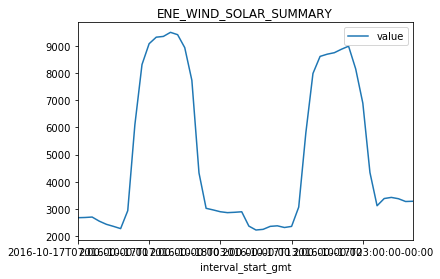

In [149]:
for title, group in df.groupby(['report']):
    group.plot.line(x='interval_start_gmt', y='value', title=title)

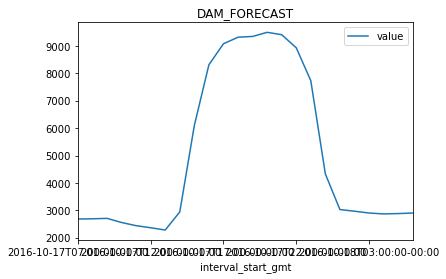

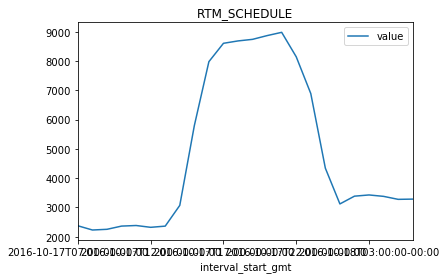

In [150]:
for title, group in df.groupby(['data_item']):
    group.plot.line(x='interval_start_gmt', y='value', title=title)